# **Make Pretrained-Model FaceNet !**


## 요구사항


노트북에서 얼굴 인식 파일을 실행시키기 위해 사전 학습 모델 만들기

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 만들기

- 1) 데이터셋을 불러오기
    - 데이터셋은 2가지. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리.
    - Keras에는 **실제로 존재하는 이미지 데이터를 처리**해주는 함수 사용하기.

데이터셋을 **학습에 적합한 형태**로 만들었다면, **FaceNet 모델로 Transfer Learning**을 수행

- 1) FaceNet 모델 구조를 생성합
    - [FaceNet 논문 링크](https://arxiv.org/abs/1503.03832)
    - FaceNet의 Input은 (160, 160) 사이즈의 이미지
- 2) FaceNet 모델 구조 + 구조 추가
    - FaceNet의 Output은 128차원의 벡터
    - 이 과정을 Transfer Learning.

학습된 모델로 추론하여 성능 지표를 확인하고 모델을 개선

그 후, 모델의 구조와 가중치를 **반드시 저장**

- 1) 다양한 모델을 사용
    - 모델에 정해진 정답은 없음
    - 성능 지표에서 무엇이 중요한지 고민하기
    - 사전 학습된 FaceNet 모델을 사용하셔도 좋고, 아예 독창적으로 나만의 모델을 만들어도 좋음
- 2) 모델을 **반드시 저장**
    - .keras 형태로 우선 Colab에 저장
    - Colab에 생성된 .keras 파일을 **로컬에 다운로드**

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project4 폴더를 만드세요.
        * 데이터 파일을 복사해 넣습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/project4'

### (2) 라이브러리 설치 및 불러오기

* 라이브러리 로딩

In [74]:
## colab에서 세션 재시작을 요구하는 팝업이 뜨면 재시작 누르세요.
!pip install keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.2 MB/s eta 0:00:00


### (1) 데이터셋 불러오기

* **세부 요구사항**
    - 데이터셋을 불러옵니다.
        - 데이터셋은 두 개의 압축 파일
            1. lfw-deepfunneled.zip : Labeled Faces in the Wild 데이터셋
            2. 여러분의 얼굴 이미지 데이터셋
                - 여러분의 얼굴 이미지가 담긴 **압축 파일**을 **Google Drive에 업로드** 하기를 권장
                    - 이미지 파일 하나하나 업로드 하면 시간이 오래 걸림
    - 데이터셋 압축 파일을 **Colab에 폴더를 생성한 후 해제**
        - 데이터셋 폴더를 **본인 얼굴 폴더, LFW 폴더로 나누어** 생성하는 것을 권장
        - 만일 두 압축 파일을 하나의 폴더에 모두 해제하면 전처리가 더 까다로워질 것
    - 예시 코드에서 사용한 라이브러리
        - os, zipfile

In [ ]:
# pip install tensorflow

In [3]:
import os
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#### 1) 본인 얼굴 이미지 데이터셋 불러오기

In [5]:
data_myFace = os.path.join(path, './Keras/my_face_exam.zip')
data_myFace

'/content/drive/MyDrive/project4/./Keras/my_face_exam.zip'

In [6]:
## Colab에 생성할 본인 얼굴 폴더 경로
extract_folder = '/content/my_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_myFace, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [7]:
## 생성된 본인 얼굴 이미지 데이터 폴더 안의 이미지 수
len(os.listdir(extract_folder) )

3000

In [ ]:
# # self

# import os
# import numpy as np
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # Google Drive 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# # 데이터셋 경로 설정
# dataset_dir = '/content/drive/MyDrive/project4/Datasets_team/my_face/my_face_exam'

# # 이미지 전처리 함수 정의
# def load_and_preprocess_images(directory):
#     images = []
#     for filename in os.listdir(directory):
#         if filename.endswith('.jpg') or filename.endswith('.png'):  # 이미지 파일 확장자 확인
#             img_path = os.path.join(directory, filename)
#             img = load_img(img_path, target_size=(160, 160))  # 원하는 크기로 조정
#             img_array = img_to_array(img) / 255.0  # 정규화
#             images.append(img_array)
#     return np.array(images)

# # 데이터셋 불러오기
# my_face_images = load_and_preprocess_images(dataset_dir)

# # 이미지 배열의 크기 확인
# print("불러온 이미지 수:", len(my_face_images))
# print("이미지 배열의 형태:", my_face_images.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
불러온 이미지 수: 3000
이미지 배열의 형태: (3000, 160, 160, 3)


#### 2) 다른 얼굴 이미지 데이터셋 불러오기

In [8]:
data_other = path + '/Keras/lfw-deepfunneled.zip'
data_other

'/content/drive/MyDrive/project4/Keras/lfw-deepfunneled.zip'

In [9]:
## Colab에 생성할 다른 얼굴 폴더 경로
extract_folder = '/content/other_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_other, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [10]:
## 생성된 다른 사람 얼굴 이미지 데이터 폴더 안의 이미지 수
len(os.listdir(extract_folder) )

13233

In [ ]:
# # self

# # 경로 설정
# test_image_path = '/content/drive/MyDrive/project4/Datasets_split/train'

# # test_image 폴더 내의 파일 및 폴더 나열
# if os.path.exists(test_image_path):
#     print(os.listdir(test_image_path))
# else:
#     print(f"경로가 존재하지 않습니다: {test_image_path}")

['my_face', 'other_face']


In [ ]:
# import shutil

# # 삭제할 폴더 경로
# folder_path = '/content/drive/MyDrive/project4/Datasets_split'

# # 폴더 삭제
# shutil.rmtree(folder_path)

# print(f"{folder_path}가 삭제되었습니다.")

/content/drive/MyDrive/project4/Datasets_split가 삭제되었습니다.


In [ ]:
# # self
# import os
# import shutil

# # 원본 이미지 경로
# source_dir = '/content/drive/MyDrive/project4/Datasets_common/Keras/lfw-deepfunneled/lfw-deepfunneled'
# # 이동할 경로
# destination_dir = '/content/drive/MyDrive/project4/Datasets_common/Keras/test_img'

# # 이동할 경로가 없다면 생성
# if not os.path.exists(destination_dir):
#     os.makedirs(destination_dir)
#     print('test_img 폴더를 생성했습니다.')

# # 원본 디렉토리 내의 폴더를 순회
# for folder_name in os.listdir(source_dir):
#     folder_path = os.path.join(source_dir, folder_name)

#     # 폴더인지 확인
#     if os.path.isdir(folder_path):
#         # 폴더 내의 이미지 파일을 찾기
#         for file_name in os.listdir(folder_path):
#             if file_name.endswith('.jpg') or file_name.endswith('.png'):  # 이미지 파일 확장자 확인
#                 # 파일 경로
#                 file_path = os.path.join(folder_path, file_name)
#                 # 파일을 새로운 경로로 이동
#                 shutil.move(file_path, destination_dir)
#                 print(f"{file_name}을 {destination_dir}로 이동했습니다.")

# print('모든 이미지 이동 완료')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Clint_Howard_0001.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Lino_Oviedo_0002.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Lino_Oviedo_0003.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Lino_Oviedo_0001.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Jackie_Dennis_0001.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Cynthia_Nixon_0001.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Desiree_McKenzie_0001.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Richard_Shelby_0002.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Richard_Shelby_0001.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Martin_Short_0001.jpg을 /content/drive/MyDrive/project4/Datasets_common/Keras/test_img로 이동했습니다.
Martha_

In [ ]:
# # self
# import os
# import numpy as np
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # Google Drive 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# # 데이터셋 경로 설정
# dataset_dir = '/content/drive/MyDrive/project4/Datasets_common/Keras/test_img'

# # 이미지 전처리 함수 정의
# def load_and_preprocess_images(directory):
#     images = []
#     for filename in os.listdir(directory):
#         if filename.endswith('.jpg') or filename.endswith('.png'):  # 이미지 파일 확장자 확인
#             img_path = os.path.join(directory, filename)
#             img = load_img(img_path, target_size=(160, 160))  # 원하는 크기로 조정
#             img_array = img_to_array(img) / 255.0  # 정규화
#             images.append(img_array)
#     return np.array(images)

# # 데이터셋 불러오기
# other_face_images = load_and_preprocess_images(dataset_dir)

# # 이미지 배열의 크기 확인
# print("불러온 이미지 수:", len(other_face_images))
# print("이미지 배열의 형태:", other_face_images.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
불러온 이미지 수: 13233
이미지 배열의 형태: (13233, 160, 160, 3)


### (2) 데이터셋 전처리
* **세부 요구사항**
    - 데이터셋을 전처리
        - Training set, Validation set, Test set으로 데이터셋을 나누기
            - 학습 과정에서 Training set, Validation set을 사용
            - 추론 과정에서 Test set을 사용
        - Keras의 **특정 함수**가 실제 존재하는 이미지 파일에 대한 전처리를 쉽게 도와줌
        - **특정 함수**에서 요구하는 폴더 구조가 있음. **특정 함수**를 사용한다면 이에 맞춰서 폴더를 생성
        - 각 데이터셋에 스케일링도 적용
    - 예시 코드에서 사용한 라이브러리
        - glob, random, shutil, numpy, keras

#### 1) 데이터셋 분할

In [11]:
import glob
import random
import shutil
import numpy as np

from keras.utils import load_img, img_to_array
from keras.utils import image_dataset_from_directory

In [12]:
## image_dataset_from_directory를 사용하기 위해 Colab에 폴더 생성

## 생성될 폴더의 경로
tr_data = '/content/tr_data'
te_data = '/content/te_data'

## 폴더가 존재하지 않을 때 폴더를 생성
if not os.path.exists(tr_data) :
    os.makedirs(tr_data)

if not os.path.exists(te_data) :
    os.makedirs(te_data)

## 폴더 생성 확인
print(os.path.exists(tr_data) )
print(os.path.exists(te_data) )

True
True


In [18]:
## Keras의 image_dataset_from_directory를 사용하기 위해 Colab에 하위 폴더 생성

## 생성될 폴더에 대한 하위 폴더 생성
class_names = ['my', 'other']

for cn in class_names :
    temp = os.path.join(tr_data, cn)

    if not os.path.exists( temp ) :
        os.makedirs(temp)

    ## 폴더 생성 확인
    print(os.path.exists(temp))

for cn in class_names :
    temp = os.path.join(te_data, cn)

    if not os.path.exists( temp ) :
        os.makedirs(temp)

    ## 폴더 생성 확인
    print(os.path.exists(temp))

True
True
True
True


In [13]:
## 본인 얼굴 데이터가 있는 폴더 경로의 파일 전체를 정렬하여 리스트화
img_list_my = sorted(glob.glob('/content/my_face/*',))

## 다른 얼굴 데이터가 있는 폴더 경로의 파일 전체를 정렬하여 리스트화
img_list_other = sorted(glob.glob('/content/other_face/*'))

## 이미지 갯수 확인
len(img_list_my), len(img_list_other)

(3000, 13233)

In [20]:
## 얼굴 데이터를 Training set, Test set으로 분할하기 위한 사전 작업
## 분할 재현성을 위한 난수 고정
random.seed(2024)
random.shuffle(img_list_my)
random.shuffle(img_list_other)

img_list_my[:5], img_list_other[:5]

(['/content/my_face/myface_2729.jpg',
  '/content/my_face/myface_21926.jpg',
  '/content/my_face/myface_2737.jpg',
  '/content/my_face/myface_2104.jpg',
  '/content/my_face/myface_22032.jpg'],
 ['/content/other_face/Colin_Powell_0233.jpg',
  '/content/other_face/Julia_Glass_0001.jpg',
  '/content/other_face/Willie_Nelson_0001.jpg',
  '/content/other_face/Habib_Rizieq_0004.jpg',
  '/content/other_face/Hugo_Chavez_0010.jpg'])

In [21]:
## Test set의 비율 설정
test_size = 0.2

## 나의 얼굴 파일 리스트와 다른 얼굴 파일 리스트에 대한 반복문
for i_l in [img_list_my, img_list_other] :
    ## 리스트의 길이 체크
    # list_len = len(i_l)
    list_len = 11000  ## 예시 파일의 이미지 갯수가 맞지 않아서 11000개까지만 사용
    ## 데이터 분할을 위한 인덱스 설정
    split_idx = int(list_len * (1 - test_size) )

    ## 인덱스를 이용해 상위 리스트를 Training set, Test set 2가지로 세분화
    list_tr = i_l[ : split_idx]
    list_te = i_l[split_idx : list_len]

    ## 현재 리스트가 나의 얼굴 파일 리스트와 같다면
    if i_l == img_list_my :
        ## "나의 얼굴 파일 리스트"의 파일을 Training set 폴더 안의 "나의 얼굴 폴더"로 복사
        ## 이동이 잘못 되었을 경우를 생각하여 복사로 진행
        for file_path in list_tr :
            f_name = file_path.split('/')
            shutil.copy(src=file_path,
                        dst=tr_data+'/my/'+f_name[-1]
                        )
            print(f'파일 이동 완료 : {f_name[-1]}')

        ## "나의 얼굴 파일 리스트"의 파일을 Test set 폴더 안의 "나의 얼굴 폴더"로 복사
        ## 이동이 잘못 되었을 경우를 생각하여 복사로 진행
        for file_path in list_te :
            f_name = file_path.split('/')
            shutil.copy(src=file_path,
                        dst=te_data+'/my/'+f_name[-1]
                        )
            print(f'파일 이동 완료 : {f_name[-1]}')

    ## 현재 리스트가 "나의 얼굴 파일 리스트"가 아니라면 (즉, "다른 사람 얼굴 파일 리스트"라면)
    else :
        ## "다른 사람 얼굴 파일 리스트"의 파일을 Training set 폴더 안의 "다른 사람 얼굴 폴더"로 복사
        ## 이동이 잘못 되었을 경우를 생각하여 복사로 진행
        for file_path in list_tr :
            f_name = file_path.split('/')
            shutil.copy(src=file_path,
                        dst=tr_data+'/other/'+f_name[-1],
                        )
            print(f'파일 이동 완료 : {f_name[-1]}')

        ## "다른 사람 얼굴 파일 리스트"의 파일을 Test set 폴더 안의 "다른 사람 얼굴 폴더"로 복사
        ## 이동이 잘못 되었을 경우를 생각하여 복사로 진행
        for file_path in list_te :
            f_name = file_path.split('/')
            shutil.copy(src=file_path,
                        dst=te_data+'/other/'+f_name[-1]
                        )
            print(f'파일 이동 완료 : {f_name[-1]}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
파일 이동 완료 : Sue_Guevara_0001.jpg
파일 이동 완료 : Jennifer_McCoy_0001.jpg
파일 이동 완료 : Steve_Avery_0001.jpg
파일 이동 완료 : Tony_Blair_0103.jpg
파일 이동 완료 : Luiz_Inacio_Lula_da_Silva_0033.jpg
파일 이동 완료 : Wesley_Clark_0002.jpg
파일 이동 완료 : Richard_Myers_0018.jpg
파일 이동 완료 : Liu_Mingkang_0001.jpg
파일 이동 완료 : George_W_Bush_0097.jpg
파일 이동 완료 : Tim_Henman_0012.jpg
파일 이동 완료 : Bernard_Landry_0004.jpg
파일 이동 완료 : Matt_Roney_0001.jpg
파일 이동 완료 : Amanda_Beard_0002.jpg
파일 이동 완료 : Guillermo_Coria_0014.jpg
파일 이동 완료 : Donald_Rumsfeld_0025.jpg
파일 이동 완료 : Michael_Wayne_0001.jpg
파일 이동 완료 : Vladimir_Putin_0001.jpg
파일 이동 완료 : John_Mayer_0002.jpg
파일 이동 완료 : Doug_Melvin_0001.jpg
파일 이동 완료 : Marco_Antonio_Barrera_0006.jpg
파일 이동 완료 : Thomas_Wyman_0002.jpg
파일 이동 완료 : Wes_Craven_0001.jpg
파일 이동 완료 : Andre_Agassi_0024.jpg
파일 이동 완료 : Jean-Claude_Van_Damme_0001.jpg
파일 이동 완료 : Tony_Blair_0056.jpg
파일 이동 완료 : Esther_Macklin_0001.jpg
파일 이동 완료 : George_W_Bush_0182.jpg
파일 이동 완료 : Nia_Vardalos_0001.jpg
파일 이동 

In [14]:
## "본인 얼굴"에 대한 파일 리스트의 상위 5개 조회
img_list_my[:5]

['/content/my_face/myface_12937.jpg',
 '/content/my_face/myface_12938.jpg',
 '/content/my_face/myface_12939.jpg',
 '/content/my_face/myface_12940.jpg',
 '/content/my_face/myface_12941.jpg']

In [15]:
## 위의 5개 파일이 image_dataset_from_directory에 맞춰 생성한 경로에 알맞게 있는지 확인
## "본인 얼굴"에 대한 파일 리스트를 정렬한 후, 8:2로 나누었기 때문에 위의 상위 5개는 반드시 Training set의 "나의 얼굴" 폴더 안에 있어야 한다.

print(os.path.exists('/content/tr_data/my/myface_2729.jpg') )
print(os.path.exists('/content/tr_data/my/myface_21926.jpg') )
print(os.path.exists('/content/tr_data/my/myface_2737.jpg') )
print(os.path.exists('/content/tr_data/my/myface_2104.jpg') )
print(os.path.exists('/content/tr_data/my/myface_22032.jpg') )

True
True
True
True
True


In [16]:
print('Training data의 my_face 이미지 수 : ', len(os.listdir('/content/tr_data/my')))
print('Training data의 other_face 이미지 수 : ', len(os.listdir('/content/tr_data/other')))

print('Test data의 my_face 이미지 수 : ', len(os.listdir('/content/te_data/my')))
print('Test data의 other_face 이미지 수 : ', len(os.listdir('/content/te_data/other')))

Training data의 my_face 이미지 수 :  3000
Training data의 other_face 이미지 수 :  8800
Test data의 my_face 이미지 수 :  0
Test data의 other_face 이미지 수 :  2200


#### 2) **특정 함수** 사용

In [18]:
## Training set 데이터 폴더를 데이터셋화
## 이 과정에서 Validation set도 생성
tr_idfd, val_idfd = image_dataset_from_directory(tr_data,                    ## Training 폴더 경로
                                                 class_names=['other','my'], ## 클래스 순서 지정
                                                 batch_size=32,              ## 이미지 덩어리 단위
                                                 image_size=(160,160),       ## 이미지 리사이즈
                                                 shuffle=True,               ## 섞어야 올바르게 분할됨
                                                 seed=2024,                  ## 재현성
                                                 validation_split=0.3,       ## 데이터 스플릿 비율
                                                 subset='both',              ## 데이터셋 나눔 방식
                                                 )

Found 11800 files belonging to 2 classes.
Using 8260 files for training.
Using 3540 files for validation.


In [19]:
## Test set 데이터 폴더를 데이터셋화
te_idfd = image_dataset_from_directory(te_data,                    ## Test 폴더 경로
                                       class_names=['other','my'], ## 클래스 순서 지정
                                       batch_size=32,              ## 이미지 덩어리 단위
                                       image_size=(160,160),       ## 이미지 리사이즈
                                       shuffle=True,               ## 섞어야 올바르게 분할됨
                                       seed=2024                   ## 재현성
                                       )

Found 2200 files belonging to 2 classes.


In [20]:
## 위에서 만든 이미지 데이터 덩어리가 몇 개인지 확인
len(tr_idfd), len(val_idfd)

(259, 111)

#### 3) 스케일링

In [21]:
def rescale(image, label) :
    image = image / 255
    return image, label

In [22]:
tr_idfd_rescale = tr_idfd.map(rescale)
val_idfd_rescale = val_idfd.map(rescale)
te_idfd_rescale = te_idfd.map(rescale)

In [ ]:
# # self
# import os
# import numpy as np
# import random
# import shutil
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # 경로 설정
# my_face_images_path = '/content/drive/MyDrive/project4/Datasets_team/my_face/my_face_exam'
# other_face_images_path = '/content/drive/MyDrive/project4/Datasets_common/Keras/test_img'  # 다른 사람 얼굴 이미지 경로
# base_dir = '/content/drive/MyDrive/project4/Datasets_split'  # 분할된 데이터셋 저장 경로

# # 데이터셋 폴더 구조 생성
# def create_dataset_structure(base_dir):
#     os.makedirs(os.path.join(base_dir, 'train', 'my_face'), exist_ok=True)
#     os.makedirs(os.path.join(base_dir, 'train', 'other_face'), exist_ok=True)
#     os.makedirs(os.path.join(base_dir, 'val', 'my_face'), exist_ok=True)
#     os.makedirs(os.path.join(base_dir, 'val', 'other_face'), exist_ok=True)
#     os.makedirs(os.path.join(base_dir, 'test', 'my_face'), exist_ok=True)
#     os.makedirs(os.path.join(base_dir, 'test', 'other_face'), exist_ok=True)

# # 데이터셋 생성 함수
# def split_and_copy_images(source_dir, label, train_ratio=0.7, val_ratio=0.15):
#     all_images = os.listdir(source_dir)
#     random.shuffle(all_images)  # 무작위로 섞기

#     total_images = len(all_images)
#     train_count = int(train_ratio * total_images)
#     val_count = int(val_ratio * total_images)

#     # Train set
#     for img in all_images[:train_count]:
#         src = os.path.join(source_dir, img)
#         dst = os.path.join(base_dir, 'train', label, img)
#         shutil.copy(src, dst)

#     # Validation set
#     for img in all_images[train_count:train_count + val_count]:
#         src = os.path.join(source_dir, img)
#         dst = os.path.join(base_dir, 'val', label, img)
#         shutil.copy(src, dst)

#     # Test set
#     for img in all_images[train_count + val_count:]:
#         src = os.path.join(source_dir, img)
#         dst = os.path.join(base_dir, 'test', label, img)
#         shutil.copy(src, dst)

# # 데이터셋 구조 생성
# create_dataset_structure(base_dir)

# # 본인 얼굴 데이터셋 복사
# split_and_copy_images(my_face_images_path, 'my_face')

# # 다른 사람 얼굴 데이터셋 복사
# split_and_copy_images(other_face_images_path, 'other_face')

# # 데이터 전처리 및 증강
# train_datagen = ImageDataGenerator(rescale=1./255)  # 스케일링
# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # 데이터 제너레이터 생성
# train_generator = train_datagen.flow_from_directory(
#     os.path.join(base_dir, 'train'),
#     target_size=(160, 160),
#     batch_size=32,
#     class_mode='binary'  # 이진 분류
# )

# val_generator = val_datagen.flow_from_directory(
#     os.path.join(base_dir, 'val'),
#     target_size=(160, 160),
#     batch_size=32,
#     class_mode='binary'
# )

# test_generator = test_datagen.flow_from_directory(
#     os.path.join(base_dir, 'test'),
#     target_size=(160, 160),
#     batch_size=32,
#     class_mode='binary'
# )

# print("데이터셋 전처리 및 분할 완료")


Found 11363 images belonging to 2 classes.
Found 2434 images belonging to 2 classes.
Found 2436 images belonging to 2 classes.
데이터셋 전처리 및 분할 완료


데이터셋을 **학습에 적합한 형태**로 만들었다면, **FaceNet 모델로 Transfer Learning**을 수행

- 1) FaceNet 모델 구조를 생성
    - [FaceNet 논문 링크](https://arxiv.org/abs/1503.03832)
    - FaceNet의 Input은 (160, 160) 사이즈의 이미지
- 2) FaceNet 모델 구조 + 구조 추가
    - FaceNet의 Output은 128차원의 벡터
    - 이 과정을 Transfer Learning

### (1) FaceNet 구조 생성

* **세부 요구사항**
    - FaceNet의 구조를 생성
        - FaceNet 구조 생성에 필요한 함수를 만들기.
    - FaceNet의 구조에 **잘 학습된 가중치**를 부여
        - FaceNet 원본 가중치 파일을 공유.
    - (선택사항) FaceNet 모델의 가중치 업데이트를 방지
    - 예시 코드에서 사용한 라이브러리
        - numpy, functools, keras

#### 1) 모델 구조 생성

In [23]:
import numpy as np
from functools import partial


import keras
from keras.models import Model

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Activation
from keras.layers import BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.layers import Lambda, Concatenate, add

from keras import backend as K
from keras.saving import register_keras_serializable

In [24]:
@register_keras_serializable()
def scaling(x, scale):
    return x * scale

@register_keras_serializable()
def conv2d_bn(x,
              filters,
              kernel_size,
              strides=1,
              padding='same',
              activation='relu',
              use_bias=False,
              name=None):
    x = Conv2D(filters,
               kernel_size,
               strides=strides,
               padding=padding,
               use_bias=use_bias,
               name=name)(x)
    if not use_bias:
        bn_axis = 1 if K.image_data_format() == 'channels_first' else 3
        bn_name = _generate_layer_name('BatchNorm', prefix=name)
        x = BatchNormalization(axis=bn_axis, momentum=0.995, epsilon=0.001,
                               scale=False, name=bn_name)(x)
    if activation is not None:
        ac_name = _generate_layer_name('Activation', prefix=name)
        x = Activation(activation, name=ac_name)(x)
    return x

@register_keras_serializable()
def _generate_layer_name(name, branch_idx=None, prefix=None):
    if prefix is None:
        return None
    if branch_idx is None:
        return '_'.join((prefix, name))
    return '_'.join((prefix, 'Branch', str(branch_idx), name))

@register_keras_serializable()
def _inception_resnet_block(x, scale, block_type, block_idx, activation='relu'):
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    if block_idx is None:
        prefix = None
    else:
        prefix = '_'.join((block_type, str(block_idx)))
    name_fmt = partial(_generate_layer_name, prefix=prefix)

    if block_type == 'Block35':
        branch_0 = conv2d_bn(x, 32, 1, name=name_fmt('Conv2d_1x1', 0))
        branch_1 = conv2d_bn(x, 32, 1, name=name_fmt('Conv2d_0a_1x1', 1))
        branch_1 = conv2d_bn(branch_1, 32, 3, name=name_fmt('Conv2d_0b_3x3', 1))
        branch_2 = conv2d_bn(x, 32, 1, name=name_fmt('Conv2d_0a_1x1', 2))
        branch_2 = conv2d_bn(branch_2, 32, 3, name=name_fmt('Conv2d_0b_3x3', 2))
        branch_2 = conv2d_bn(branch_2, 32, 3, name=name_fmt('Conv2d_0c_3x3', 2))
        branches = [branch_0, branch_1, branch_2]
    elif block_type == 'Block17':
        branch_0 = conv2d_bn(x, 128, 1, name=name_fmt('Conv2d_1x1', 0))
        branch_1 = conv2d_bn(x, 128, 1, name=name_fmt('Conv2d_0a_1x1', 1))
        branch_1 = conv2d_bn(branch_1, 128, [1, 7], name=name_fmt('Conv2d_0b_1x7', 1))
        branch_1 = conv2d_bn(branch_1, 128, [7, 1], name=name_fmt('Conv2d_0c_7x1', 1))
        branches = [branch_0, branch_1]
    elif block_type == 'Block8':
        branch_0 = conv2d_bn(x, 192, 1, name=name_fmt('Conv2d_1x1', 0))
        branch_1 = conv2d_bn(x, 192, 1, name=name_fmt('Conv2d_0a_1x1', 1))
        branch_1 = conv2d_bn(branch_1, 192, [1, 3], name=name_fmt('Conv2d_0b_1x3', 1))
        branch_1 = conv2d_bn(branch_1, 192, [3, 1], name=name_fmt('Conv2d_0c_3x1', 1))
        branches = [branch_0, branch_1]
    else:
        raise ValueError('Unknown Inception-ResNet block type. '
                         'Expects "Block35", "Block17" or "Block8", '
                         'but got: ' + str(block_type))

    mixed = Concatenate(axis=channel_axis, name=name_fmt('Concatenate'))(branches)
    up = conv2d_bn(mixed,
                #    K.int_shape(x)[channel_axis],
                   x.shape[channel_axis],
                   1,
                   activation=None,
                   use_bias=True,
                   name=name_fmt('Conv2d_1x1'))
    up = Lambda(scaling,
                # output_shape=K.int_shape(up)[1:],
                output_shape=up.shape[1:],
                arguments={'scale': scale})(up)
    x = add([x, up])
    if activation is not None:
        x = Activation(activation, name=name_fmt('Activation'))(x)
    return x

In [25]:
@register_keras_serializable()
def InceptionResNetV1(input_shape=(160, 160, 3),
                      classes=128,
                      dropout_keep_prob=0.8,
                      weights_path=None):
    inputs = Input(shape=input_shape)
    x = conv2d_bn(inputs, 32, 3, strides=2, padding='valid', name='Conv2d_1a_3x3')
    x = conv2d_bn(x, 32, 3, padding='valid', name='Conv2d_2a_3x3')
    x = conv2d_bn(x, 64, 3, name='Conv2d_2b_3x3')
    x = MaxPooling2D(3, strides=2, name='MaxPool_3a_3x3')(x)
    x = conv2d_bn(x, 80, 1, padding='valid', name='Conv2d_3b_1x1')
    x = conv2d_bn(x, 192, 3, padding='valid', name='Conv2d_4a_3x3')
    x = conv2d_bn(x, 256, 3, strides=2, padding='valid', name='Conv2d_4b_3x3')

    # 5x Block35 (Inception-ResNet-A block):
    for block_idx in range(1, 6):
        x = _inception_resnet_block(x,
                                    scale=0.17,
                                    block_type='Block35',
                                    block_idx=block_idx)

    # Mixed 6a (Reduction-A block):
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    name_fmt = partial(_generate_layer_name, prefix='Mixed_6a')
    branch_0 = conv2d_bn(x,
                         384,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 0))
    branch_1 = conv2d_bn(x, 192, 1, name=name_fmt('Conv2d_0a_1x1', 1))
    branch_1 = conv2d_bn(branch_1, 192, 3, name=name_fmt('Conv2d_0b_3x3', 1))
    branch_1 = conv2d_bn(branch_1,
                         256,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 1))
    branch_pool = MaxPooling2D(3,
                               strides=2,
                               padding='valid',
                               name=name_fmt('MaxPool_1a_3x3', 2))(x)
    branches = [branch_0, branch_1, branch_pool]
    x = Concatenate(axis=channel_axis, name='Mixed_6a')(branches)

    # 10x Block17 (Inception-ResNet-B block):
    for block_idx in range(1, 11):
        x = _inception_resnet_block(x,
                                    scale=0.1,
                                    block_type='Block17',
                                    block_idx=block_idx)

    # Mixed 7a (Reduction-B block): 8 x 8 x 2080
    name_fmt = partial(_generate_layer_name, prefix='Mixed_7a')
    branch_0 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 0))
    branch_0 = conv2d_bn(branch_0,
                         384,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 0))
    branch_1 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 1))
    branch_1 = conv2d_bn(branch_1,
                         256,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 1))
    branch_2 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 2))
    branch_2 = conv2d_bn(branch_2, 256, 3, name=name_fmt('Conv2d_0b_3x3', 2))
    branch_2 = conv2d_bn(branch_2,
                         256,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 2))
    branch_pool = MaxPooling2D(3,
                               strides=2,
                               padding='valid',
                               name=name_fmt('MaxPool_1a_3x3', 3))(x)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    x = Concatenate(axis=channel_axis, name='Mixed_7a')(branches)

    # 5x Block8 (Inception-ResNet-C block):
    for block_idx in range(1, 6):
        x = _inception_resnet_block(x,
                                    scale=0.2,
                                    block_type='Block8',
                                    block_idx=block_idx)
    x = _inception_resnet_block(x,
                                scale=1.,
                                activation=None,
                                block_type='Block8',
                                block_idx=6)

    # Classification block
    x = GlobalAveragePooling2D(name='AvgPool')(x)
    x = Dropout(1.0 - dropout_keep_prob, name='Dropout')(x)
    # Bottleneck
    x = Dense(classes, use_bias=False, name='Bottleneck')(x)
    bn_name = _generate_layer_name('BatchNorm', prefix='Bottleneck')
    x = BatchNormalization(momentum=0.995, epsilon=0.001, scale=False,
                           name=bn_name)(x)

    # Create model
    model = Model(inputs, x, name='inception_resnet_v1')
    if weights_path is not None:
        model.load_weights(weights_path)

    return model

In [26]:
## 3.6.0.dev2024100303 OK
## 3.6.0 dev2024101103
keras.__version__

'3.7.0.dev2024102803'

In [27]:
## FaceNet 구조 생성 코드
facenet_model = InceptionResNetV1()

In [28]:
## FaceNet 구조의 전체 레이어 길이
len(facenet_model.layers)

447

In [29]:
## FaceNet 전체 구조 확인
facenet_model.summary()

Model: "inception_resnet_v1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_1a_3x3 (Conv2D)    │ (None, 79, 79, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_1a_3x3_BatchNorm   │ (None, 79, 79, 32)     │             96 │ Conv2d_1a_3x3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_1a_3x3_Activation  │ (None, 79, 79, 32)     │              0 │ Conv2d_1a_3x3_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2a_3x3 (Conv2D)    │ (None, 77, 77, 32)     │          9,216 │ Conv2d_1a_3x3_Activat… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2a_3x3_BatchNorm   │ (None, 77, 77, 32)     │             96 │ Conv2d_2a_3x3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2a_3x3_Activation  │ (None, 77, 77, 32)     │              0 │ Conv2d_2a_3x3_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2b_3x3 (Conv2D)    │ (None, 77, 77, 64)     │         18,432 │ Conv2d_2a_3x3_Activat… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2b_3x3_BatchNorm   │ (None, 77, 77, 64)     │            192 │ Conv2d_2b_3x3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2b_3x3_Activation  │ (None, 77, 77, 64)     │              0 │ Conv2d_2b_3x3_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool_3a_3x3            │ (None, 38, 38, 64)     │              0 │ Conv2d_2b_3x3_Activat… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_3b_1x1 (Conv2D)    │ (None, 38, 38, 80)     │          5,120 │ MaxPool_3a_3x3[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_3b_1x1_BatchNorm   │ (None, 38, 38, 80)     │            240 │ Conv2d_3b_1x1[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_3b_1x1_Activation  │ (None, 38, 38, 80)     │              0 │ Conv2d_3b_1x1_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_4a_3x3 (Conv2D)    │ (None, 36, 36, 192)    │        138,240 │ Conv2d_3b_1x1_Activat… │
├──────────────────────

 Total params: 22,808,144 (87.01 MB)

 Trainable params: 22,779,312 (86.90 MB)

 Non-trainable params: 28,832 (112.62 KB)

In [ ]:
#  = InceptionResNetV1()

In [ ]:
# self

# import os
# import numpy as np
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.models import Model
# from keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # 데이터셋 경로
# base_dir = '/content/drive/MyDrive/project4/Datasets_split'

# # 하이퍼파라미터 설정
# input_shape = (160, 160, 3)
# output_dim = 2  # 이진 분류이므로 2로 설정
# dropout_keep_prob = 0.8
# batch_size = 32
# epochs = 50

# # 데이터 전처리 및 증강
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# val_datagen = ImageDataGenerator(rescale=1./255)

# # 데이터 제너레이터 생성
# train_generator = train_datagen.flow_from_directory(
#     os.path.join(base_dir, 'train'),
#     target_size=(160, 160),
#     batch_size=batch_size,
#     class_mode='categorical'  # 원-핫 인코딩으로 레이블 변환
# )

# val_generator = val_datagen.flow_from_directory(
#     os.path.join(base_dir, 'val'),
#     target_size=(160, 160),
#     batch_size=batch_size,
#     class_mode='categorical'  # 원-핫 인코딩으로 레이블 변환
# )

# # FaceNet 모델 생성
# def InceptionResNetV1(input_shape=(160, 160, 3), output_dim=2, dropout_keep_prob=0.8):
#     inputs = Input(shape=input_shape)
#     x = conv2d_bn(inputs, 32, 3, strides=2, padding='valid', name='Conv2d_1a_3x3')
#     x = conv2d_bn(x, 32, 3, padding='valid', name='Conv2d_2a_3x3')
#     x = conv2d_bn(x, 64, 3, name='Conv2d_2b_3x3')
#     x = MaxPooling2D(3, strides=2, name='MaxPool_3a_3x3')(x)
#     x = conv2d_bn(x, 80, 1, padding='valid', name='Conv2d_3b_1x1')
#     x = conv2d_bn(x, 192, 3, padding='valid', name='Conv2d_4a_3x3')
#     x = conv2d_bn(x, 256, 3, strides=2, padding='valid', name='Conv2d_4b_3x3')

#     # 5x Block35 (Inception-ResNet-A block):
#     for block_idx in range(1, 6):
#         x = _inception_resnet_block(x, scale=0.17, block_type='Block35', block_idx=block_idx)

#     # Mixed 6a (Reduction-A block):
#     channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
#     name_fmt = partial(_generate_layer_name, prefix='Mixed_6a')
#     branch_0 = conv2d_bn(x, 384, 3, strides=2, padding='valid', name=name_fmt('Conv2d_1a_3x3', 0))
#     branch_1 = conv2d_bn(x, 192, 1, name=name_fmt('Conv2d_0a_1x1', 1))
#     branch_1 = conv2d_bn(branch_1, 192, 3, name=name_fmt('Conv2d_0b_3x3', 1))
#     branch_1 = conv2d_bn(branch_1, 256, 3, strides=2, padding='valid', name=name_fmt('Conv2d_1a_3x3', 1))
#     branch_pool = MaxPooling2D(3, strides=2, padding='valid', name=name_fmt('MaxPool_1a_3x3', 2))(x)
#     branches = [branch_0, branch_1, branch_pool]
#     x = Concatenate(axis=channel_axis, name='Mixed_6a')(branches)

#     # 10x Block17 (Inception-ResNet-B block):
#     for block_idx in range(1, 11):
#         x = _inception_resnet_block(x, scale=0.1, block_type='Block17', block_idx=block_idx)

#     # Mixed 7a (Reduction-B block):
#     name_fmt = partial(_generate_layer_name, prefix='Mixed_7a')
#     branch_0 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 0))
#     branch_0 = conv2d_bn(branch_0, 384, 3, strides=2, padding='valid', name=name_fmt('Conv2d_1a_3x3', 0))
#     branch_1 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 1))
#     branch_1 = conv2d_bn(branch_1, 256, 3, strides=2, padding='valid', name=name_fmt('Conv2d_1a_3x3', 1))
#     branch_2 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 2))
#     branch_2 = conv2d_bn(branch_2, 256, 3, name=name_fmt('Conv2d_0b_3x3', 2))
#     branch_2 = conv2d_bn(branch_2, 256, 3, strides=2, padding='valid', name=name_fmt('Conv2d_1a_3x3', 2))
#     branch_pool = MaxPooling2D(3, strides=2, padding='valid', name=name_fmt('MaxPool_1a_3x3', 3))(x)
#     branches = [branch_0, branch_1, branch_2, branch_pool]
#     x = Concatenate(axis=channel_axis, name='Mixed_7a')(branches)

#     # 5x Block8 (Inception-ResNet-C block):
#     for block_idx in range(1, 6):
#         x = _inception_resnet_block(x, scale=0.2, block_type='Block8', block_idx=block_idx)
#     x = _inception_resnet_block(x, scale=1., activation=None, block_type='Block8', block_idx=6)

#     # Classification block
#     x = GlobalAveragePooling2D(name='AvgPool')(x)
#     x = Dropout(1.0 - dropout_keep_prob, name='Dropout')(x)
#     # Bottleneck
#     x = Dense(output_dim, activation='softmax', use_bias=False, name='Bottleneck')(x)  # 2차원 출력

#     # Create model
#     model = Model(inputs, x, name='inception_resnet_v1')
#     return model

# # 모델 생성
# model = InceptionResNetV1(input_shape=input_shape, output_dim=output_dim, dropout_keep_prob=dropout_keep_prob)

# # 모델 컴파일
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# # 콜백 설정
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# # 모델 학습
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=epochs,
#     callbacks=[early_stopping, checkpoint]
# )

# # 테스트 데이터셋에 대한 평가
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     os.path.join(base_dir, 'test'),
#     target_size=(160, 160),
#     batch_size=batch_size,
#     class_mode='categorical'  # 원-핫 인코딩으로 레이블 변환
# )

# test_loss, test_accuracy = model.evaluate(test_generator)
# print(f'테스트 손실: {test_loss}, 테스트 정확도: {test_accuracy}')


Found 11363 images belonging to 2 classes.
Found 2434 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


356/356 ━━━━━━━━━━━━━━━━━━━━ 255s 450ms/step - accuracy: 0.9814 - loss: 0.0488 - val_accuracy: 0.9491 - val_loss: 0.1622
Epoch 2/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 110s 299ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9996 - val_loss: 0.0050
Epoch 3/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 110s 303ms/step - accuracy: 0.9981 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 3.5421e-04
Epoch 4/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 109s 296ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.8763 - val_loss: 0.5769
Epoch 5/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 110s 304ms/step - accuracy: 0.9985 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 1.0562e-05
Epoch 6/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 109s 299ms/step - accuracy: 0.9984 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 9.7181e-07
Epoch 7/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 108s 295ms/step - accuracy: 0.9991 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 7.2817e-05
Epoch 8/50
356/356 ━━━━━━━━━━━━━━━━━━━━ 105s 290ms/step - accuracy: 0.9

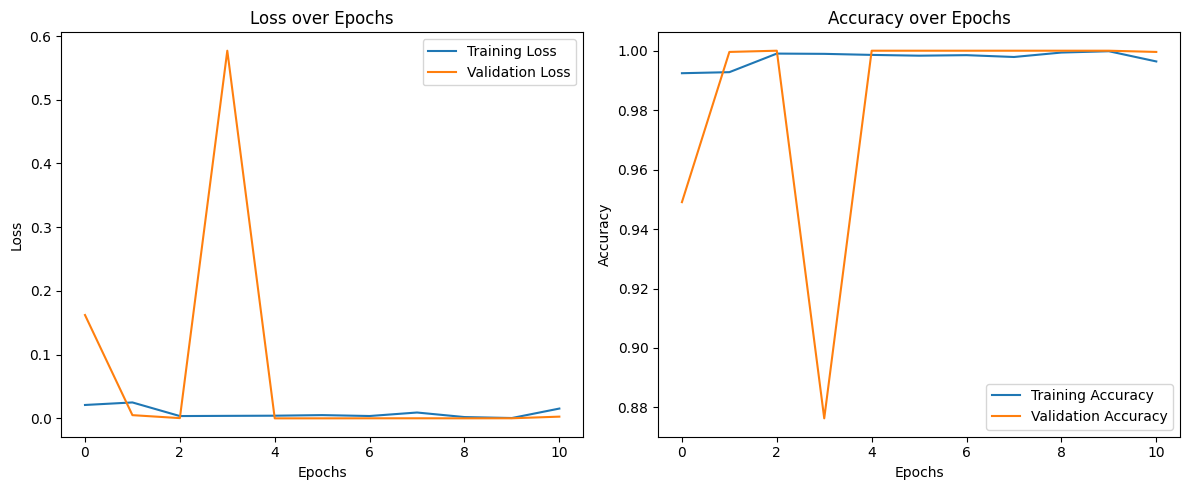

In [ ]:
# self

# import matplotlib.pyplot as plt

# # 손실 시각화
# plt.figure(figsize=(12, 5))

# # 손실 그래프
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # 정확도 그래프
# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()


#### 2) 모델에 가중치 적용

In [30]:

## FaceNet 가중치 파일 경로 설정
weights_path = os.path.join(path,'./Keras/facenet_model_weights.npz' )
weights_path

'/content/drive/MyDrive/project4/./Keras/facenet_model_weights.npz'

In [31]:
## 가중치 파일 불러오기
loaded_weights = np.load(weights_path)

loaded_weights

NpzFile '/content/drive/MyDrive/project4/./Keras/facenet_model_weights.npz' with keys: arr_0, arr_1, arr_2, arr_3, arr_4...

In [32]:
## FaceNet 각 레이어에 가중치 적용
facenet_model.set_weights([loaded_weights[key] for key in loaded_weights])

#### 3) 모델의 가중치 업데이트 방지 (선택사항)

In [33]:
## FaceNet 전체 레이어 확인
facenet_model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=Conv2d_1a_3x3, built=True>,
 <BatchNormalization name=Conv2d_1a_3x3_BatchNorm, built=True>,
 <Activation name=Conv2d_1a_3x3_Activation, built=True>,
 <Conv2D name=Conv2d_2a_3x3, built=True>,
 <BatchNormalization name=Conv2d_2a_3x3_BatchNorm, built=True>,
 <Activation name=Conv2d_2a_3x3_Activation, built=True>,
 <Conv2D name=Conv2d_2b_3x3, built=True>,
 <BatchNormalization name=Conv2d_2b_3x3_BatchNorm, built=True>,
 <Activation name=Conv2d_2b_3x3_Activation, built=True>,
 <MaxPooling2D name=MaxPool_3a_3x3, built=True>,
 <Conv2D name=Conv2d_3b_1x1, built=True>,
 <BatchNormalization name=Conv2d_3b_1x1_BatchNorm, built=True>,
 <Activation name=Conv2d_3b_1x1_Activation, built=True>,
 <Conv2D name=Conv2d_4a_3x3, built=True>,
 <BatchNormalization name=Conv2d_4a_3x3_BatchNorm, built=True>,
 <Activation name=Conv2d_4a_3x3_Activation, built=True>,
 <Conv2D name=Conv2d_4b_3x3, built=True>,
 <BatchNormalization name=Conv2d_4b_3x3_BatchNorm,

In [34]:
## FaceNet 전체 레이어 가중치 업데이트 방지
for l in facenet_model.layers :
    l.trainable = False

### (2) 모델 구조 변형

* **세부 요구사항**
    - 우리의 문제에 맞게 모델을 변형해야 합니다.
    - 예시 코드에서 사용한 라이브러리
        - keras

#### 1) 추가 모델링

In [35]:
facenet_model.summary()

Model: "inception_resnet_v1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_1a_3x3 (Conv2D)    │ (None, 79, 79, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_1a_3x3_BatchNorm   │ (None, 79, 79, 32)     │             96 │ Conv2d_1a_3x3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_1a_3x3_Activation  │ (None, 79, 79, 32)     │              0 │ Conv2d_1a_3x3_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2a_3x3 (Conv2D)    │ (None, 77, 77, 32)     │          9,216 │ Conv2d_1a_3x3_Activat… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2a_3x3_BatchNorm   │ (None, 77, 77, 32)     │             96 │ Conv2d_2a_3x3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2a_3x3_Activation  │ (None, 77, 77, 32)     │              0 │ Conv2d_2a_3x3_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2b_3x3 (Conv2D)    │ (None, 77, 77, 64)     │         18,432 │ Conv2d_2a_3x3_Activat… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2b_3x3_BatchNorm   │ (None, 77, 77, 64)     │            192 │ Conv2d_2b_3x3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2b_3x3_Activation  │ (None, 77, 77, 64)     │              0 │ Conv2d_2b_3x3_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool_3a_3x3            │ (None, 38, 38, 64)     │              0 │ Conv2d_2b_3x3_Activat… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_3b_1x1 (Conv2D)    │ (None, 38, 38, 80)     │          5,120 │ MaxPool_3a_3x3[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_3b_1x1_BatchNorm   │ (None, 38, 38, 80)     │            240 │ Conv2d_3b_1x1[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_3b_1x1_Activation  │ (None, 38, 38, 80)     │              0 │ Conv2d_3b_1x1_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_4a_3x3 (Conv2D)    │ (None, 36, 36, 192)    │        138,240 │ Conv2d_3b_1x1_Activat… │
├──────────────────────

 Total params: 22,808,144 (87.01 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 22,808,144 (87.01 MB)

In [36]:
# from keras.layers import Flatten
# ## FaceNet 모델에 이진 분류용 레이어 하나 추가
# K.clear_session()

# custom_model = keras.models.Sequential()

# custom_model.add(facenet_model)
# # custom_model.add(Flatten())
# custom_model.add(Dense(1, activation='sigmoid') )

In [52]:
from keras.layers import Flatten
## FaceNet 모델에 이진 분류용 레이어 하나 추가
K.clear_session()

custom_model = keras.models.Sequential()

custom_model.add(facenet_model)
# custom_model.add(Flatten())
custom_model.add(Dense(1, activation='softmax') )

In [53]:
custom_model.summary() ## keras-nightly로는 정상 작동

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v1 (Functional)     │ (None, 128)                 │      22,808,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,808,273 (87.01 MB)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 22,808,144 (87.01 MB)

In [54]:
custom_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'precision', 'recall']
                     )

## 5.미션3

학습된 모델로 추론하여 성능 지표를 확인하고 모델을 개선시키세요.

그 후, 모델의 구조와 가중치를 **반드시 저장**하여 여러분의 노트북에 옮기세요.

- 1) 다양한 모델을 사용해보세요.
    - 모델에 정해진 정답은 없습니다.
    - 성능 지표에서 무엇이 중요한지 깊게 생각하세요.
    - 사전 학습된 FaceNet 모델을 사용하셔도 좋고, 아예 독창적으로 여러분만의 모델을 만드셔도 좋습니다!
- 2) 모델을 **반드시 저장**하세요.
    - .keras 형태로 우선 Colab에 저장하세요.
    - Colab에 생성된 .keras 파일을 **로컬에 다운로드** 합니다.

### (1) 모델 학습

* **세부 요구사항**
    - 모델 구조를 잘 변형하였다면, 학습도 진행해야 합니다.
        - Keras에서 지원하는 다양한 함수를 사용하세요.
    - 예시 코드에서 사용한 라이브러리
        - keras

#### 1) 학습에 유용한 함수 불러오기

In [55]:
from keras.callbacks import EarlyStopping

In [56]:
## 얼리스토핑 설정
es = EarlyStopping(patience=4, verbose=1, restore_best_weights=True)

#### 2) 모델 학습

In [57]:
## 모델 학습
custom_model.fit(tr_idfd, validation_data=val_idfd,
                 epochs=100, verbose=1,
                 class_weight={0:1, 1:2}, ## 클래스 1에 대해 가중치를 더 주려는 의도
                 callbacks=[es]
                 )

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:665: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


259/259 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.2550 - loss: 0.7035 - precision: 0.2550 - recall: 1.0000 - val_accuracy: 0.2455 - val_loss: 0.2846 - val_precision: 0.2455 - val_recall: 1.0000
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2555 - loss: 0.3888 - precision: 0.2555 - recall: 1.0000 - val_accuracy: 0.2455 - val_loss: 0.2152 - val_precision: 0.2455 - val_recall: 1.0000
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2555 - loss: 0.3042 - precision: 0.2555 - recall: 1.0000 - val_accuracy: 0.2455 - val_loss: 0.1667 - val_precision: 0.2455 - val_recall: 1.0000
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.2560 - loss: 0.2621 - precision: 0.2560 - recall: 1.0000 - val_accuracy: 0.2455 - val_loss: 0.1526 - val_precision: 0.2455 - val_recall: 1.0000
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2563 - loss: 0.2335 - precision: 0.2563 - recall: 1.0000 - val_accuracy: 0.2455 - val_loss: 0.1

### (2) 모델 추론

* **세부 요구사항**
    - 학습된 모델의 성능을 확인해보세요.
        - 임계값 조절, 클래스 가중치 부여 등으로 모델의 성능을 높여보세요.
    - 예시 코드에서 사용한 라이브러리
        - keras, sklearn

#### 1) 모델 추론

In [58]:
## image_dataset_from_directory로 만든 Test set로 예측값 생성
y_pred = custom_model.predict(te_idfd)
y_pred

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:665: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [59]:
## 예측값에 대한 임계값을 0.5로 설정하여 0과 1로 구분
y_pred_fix = np.where(y_pred>=0.5, 1, 0)
y_pred_fix = y_pred_fix.flatten()
y_pred_fix

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
len(y_pred_fix.nonzero()[0])

2200

#### 2) 성능 확인

In [61]:
from sklearn.metrics import classification_report

In [62]:
## 성능 확인을 위하여 Test set의 Y만 떼와 array로 저장
temp = []

for te_x, te_y in te_idfd :
    temp.append(te_y.numpy())

y_true = np.concatenate(temp)

In [63]:
len(y_true.nonzero()[0])

0

In [64]:
print(classification_report(y_true, y_pred_fix, target_names=['other', 'my']) )

              precision    recall  f1-score   support

       other       0.00      0.00      0.00    2200.0
          my       0.00      0.00      0.00       0.0

    accuracy                           0.00    2200.0
   macro avg       0.00      0.00      0.00    2200.0
weighted avg       0.00      0.00      0.00    2200.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

### (3) 모델 저장

* **세부 요구사항**
    - **반드시 반드시 모델을 저장하고 로컬에 다운로드하세요.**
    - 예시 코드에서 사용한 라이브러리
        - keras

#### 1) 모델 저장

In [65]:
## .keras로 저장해야 안전
custom_model.save('./my_model_softmax.keras')

#### 2) 저장된 모델 체크

In [67]:
## Colab에 저장된 모델을 불러와 확인
temp_model = keras.saving.load_model('./my_model_softmax.keras')
temp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v1 (Functional)     │ (None, 128)                 │      22,808,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,808,533 (87.01 MB)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 22,808,144 (87.01 MB)

 Optimizer params: 260 (1.02 KB)